In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from ipywidgets import interact, widgets
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import ScalarFormatter
import warnings 
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

wine_production_path = "Resources/wine-production.csv"
global_temps_path = "Resources/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"

wine_production_data = pd.read_csv(wine_production_path)
global_temps_data = pd.read_csv(global_temps_path)


In [3]:
#Cleaning up GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv
unique_countries_wine = wine_production_data['Entity'].unique()

#clean up global_temps_data and return only relevant years
global_temps_data['dt'] = pd.to_datetime(global_temps_data['dt'])
global_temps_data_1961 = global_temps_data[global_temps_data['dt']>='1961-01-01']
#global_temps_data_1961

global_temps_data_1961['Year'] = ""
global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year

global_temps_data_1961['AverageTemperature'] = (global_temps_data_1961['AverageTemperature'] * 9/5) + 32

global_temps_grouped_mean = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].mean()
global_temps_grouped_median = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].median()
global_temps_grouped_max = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].max()
global_temps_grouped_min = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].min()
global_temps_grouped_std = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].std()


global_temps = pd.DataFrame({
    "Average Temperature (F°)" : global_temps_grouped_mean,
    "Minimum Temperature (F°)" : global_temps_grouped_min,
    "Maximum Temperature (F°)" : global_temps_grouped_max,
    "Median Temperature (F°)" : global_temps_grouped_median,
    "Standard Deviation" : global_temps_grouped_std
})


global_temps.to_csv("Resources/global_temps.csv", index_label="Country")

global_temps


#merged_data = pd.merge(wine_production_data, global_temps_data, on="Country", how="inner")


#merge_data = pd.merge(wine_production_data, global_temps_data, how="inner", left_on="Entity", right_on="Country")
#merge_data


#unique_countries_wine
#create new data frame with global temp. Group by country, year and calculate the mean, max, min temps. left_on=year. right_on = country
#1. group by country 
#2. group by year

#inner join will filter out rows


C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_38672\3943574621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = ""
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_38672\3943574621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_38672\3943574621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Average Temperature (F°)  Minimum Temperature (F°)  \
Country     Year                                                       
Afghanistan 1961                  57.31685                   34.6676   
            1962                  56.78360                   33.1088   
            1963                  59.06015                   36.5000   
            1964                  55.55285                   24.3428   
            1965                  57.38330                   35.7746   
...                                    ...                       ...   
Åland       2009                  43.68035                   27.4208   
            2010                  40.75145                   20.4512   
            2011                  44.90735                   20.4980   
            2012                  42.91505                   25.7828   
            2013                  43.21355                   23.3978   

                  Maximum Temperature (F°)  Median Temperature (F°)  \
Country     Year                                                      
Afghanistan 1961                   81.2534                  54.9734   
            1962                   80.5298                  56.7563   
            1963                   81.0428                  60.2582   
            1964                   79.6460                  54.9059   
            1965                   80.1968                  58.1990   
...                                    ...                      ...   
Åland       2009                   61.5614                  42.0377   
            2010                   66.4142                  40.5590   
            2011                   64.4054                  45.4982   
            2012                   60.8900                  43.2572   
            2013                   61.6046                  42.8252   

                  Standard Deviation  
Country     Year                      
Afghanistan 1961           17.431491  
            1962           16.458718  
            1963           15.942641  
            1964           18.722815  
            1965           16.117239  
...                              ...  
Åland       2009           12.200169  
            2010           16.086607  
            2011           13.866469  
            2012           12.236111  
            2013           16.240937  

[12879 rows x 5 columns]

In [4]:
#Cleaning up wine production data
wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] = (wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] * 0.90718474).round(2)

In [5]:
#Merging wine-production.csv with global_temps.csv
merge_data = pd.merge(wine_production_data, global_temps, how="inner", left_on=["Entity",'Year'], right_on=["Country", 'Year'])

merge_data.rename(columns={'': 'Sheet Index', 'Entity': 'Country','Year': 'Year', 'Wine | 00000564 || Production | 005510 || tonnes': 'Wine Production (tons)'}, inplace=True)
merge_data
merge_data.to_csv("Resources/merge_data.csv", index_label="Country")


In [6]:
#Seperating data by regions and country
country_data_df = merge_data.dropna(subset=['Code'])
country_data_df.to_csv("Resources/country_data_df.csv", index_label="Country")
country_data_df

,Country,Code,Year,Wine Production (tons),Average Temperature (F°),Minimum Temperature (F°),Maximum Temperature (F°),Median Temperature (F°),Standard Deviation
53,Albania,ALB,1961,3229.58,55.97015,38.4458,71.9996,57.4232,12.240442
54,Albania,ALB,1962,4145.83,55.52375,37.1516,75.4592,55.6619,13.481548
55,Albania,ALB,1963,2078.36,55.55450,35.0384,73.7420,54.8222,13.397239
56,Albania,ALB,1964,2784.15,54.52760,33.8558,70.7504,55.0877,12.662470
57,Albania,ALB,1965,3643.25,54.28115,33.2618,73.1498,52.7630,12.910885
...,...,...,...,...,...,...,...,...,...
2976,Zimbabwe,ZWE,2009,1587.57,70.47905,59.4212,76.5158,72.4748,5.551294
2977,Zimbabwe,ZWE,2010,1587.57,71.57525,61.4786,78.6974,73.9472,6.000668
2978,Zimbabwe,ZWE,2011,1587.57,70.88435,60.4454,77.9378,73.2956,5.843389
2979,Zimbabwe,ZWE,2012,1587.57,70.73840,60.8864,76.2908,73.4819,5.532541


In [7]:
def plot_wine_production(country):
    """ Plots the wine production over years for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]
        
        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(data['Year'], data['Wine Production (tons)'], marker='o')
        plt.title(f'Wine Production Over Time in {country}')
        plt.xlabel('Year')
        plt.ylabel('Wine Production (tons)')
        plt.grid(True)
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

# Link the dropdown to the plotting function
widgets.interactive(plot_wine_production, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [8]:
# def plot_average_temp(country):
   
#     if country:
#         # Filter data for the selected country
#         data = country_data_df[country_data_df['Country'] == country]
        


#         # Plotting
#         plt.figure(figsize=(12, 6))
#         plt.scatter(data['Year'], data['Average Temperature (F°)'], color='tab:red') 
#         slope, intercept, r_value, p_value, std_err = st.linregress(data['Year'], data['Average Temperature (F°)'])
#         sns.regplot(x='Year', y='Average Temperature (F°)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}')
        
#         plt.title(f'Average Temperature (F°) Over Time in {country}')
#         plt.xlabel('Year')
#         plt.ylabel('Average Temperature (F°)')
#         plt.annotate(f'r-value = {r_value:.4f}', xy=(data['Year'].min(), data['Average Temperature (F°)'].min()), fontsize=15, color="red")  # Adjust coordinates
#         plt.grid(True)
#         plt.show()
#     else:
#         print("Please select a country.")

# # Creating a dropdown for country selection
# countries = country_data_df['Country'].unique()
# country_dropdown = widgets.Dropdown(
#     options=[('Select a country', None)] + [(country, country) for country in countries],
#     value=None,
#     description='Country:',
# )

# # Link the dropdown to the plotting function
# widgets.interactive(plot_average_temp, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [9]:
current_country = None
current_start_year = None

def plot_country_data(country, start_year):
    global fig, current_country, current_start_year
    current_country = country
    current_start_year = start_year
    """ Plots wine production and average temperature over years for a selected country. """
    if country:
        # Filter data for the selected country
        country_data = country_data_df[(country_data_df['Country'] == country) & (country_data_df['Year']>= start_year)]

        # Creating figure and first y-axis for wine production
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.plot(country_data['Year'], country_data['Wine Production (tons)'], color='tab:blue', marker='o')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Wine Production (tons)', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Creating second y-axis for temperature
        ax2 = ax1.twinx()
        ax2.plot(country_data['Year'], country_data['Average Temperature (F°)'], color='tab:red', linestyle='--')
        ax2.set_ylabel('Average Temperature (F°)', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        # Adding title and showing the plot
        plt.title(f'Wine Production and Average Temperature in {country} Over Time from {start_year}')
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)
#Creating a dropdown for year selection
years = sorted(country_data_df['Year'].unique())
year_dropdown = widgets.Dropdown(
    options=[('Select a year', None)] + [(year, year) for year in years],
    value=None,
    description='Start Year:',
)

def save_plot(b):
    global fig, current_country, current_start_year
    try:
        fig.savefig(f"wine_prod_avg_temp_{current_country}_{current_start_year}_plot.png")
        print("Plot saved as 'wine_prod_avg_temp_{}_{}_plot.png'.".format(current_country, current_start_year))
    except NameError:
        print("No plot to save. Please generate a plot first.")
save_button = widgets.Button(description="Save Chart")
# Link the dropdown to the plotting function
save_button.on_click(save_plot)
display(save_button)
widgets.interactive(plot_country_data, country=country_dropdown, start_year=year_dropdown)

Button(description='Save Chart', style=ButtonStyle())

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

Plot saved as 'wine_prod_avg_temp_New Zealand_1990_plot.png'.


Button(description='Save Chart', style=ButtonStyle())

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

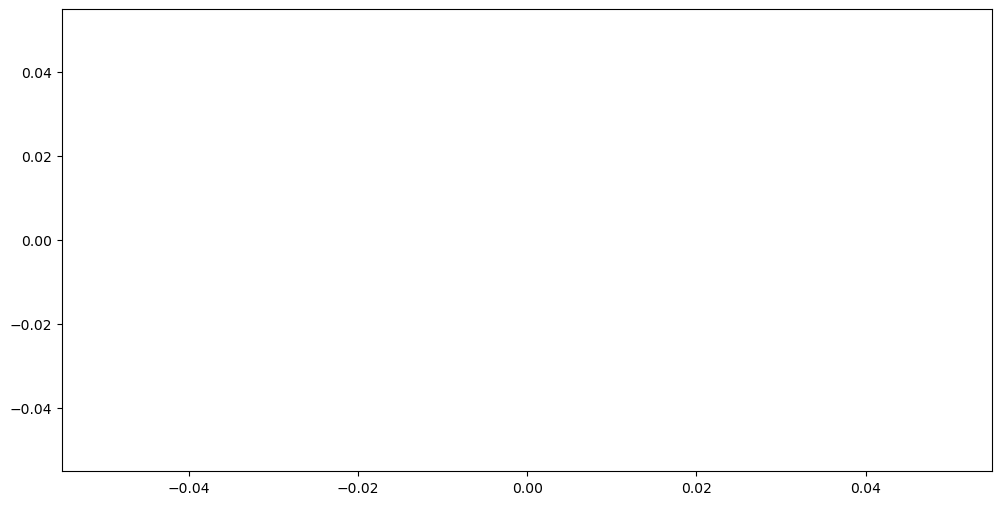

In [54]:
current_country = None
current_start_year = None

def plot_average_temp(country, start_year):
    global fig, current_country, current_start_year
    current_country = country
    current_start_year = start_year
    """ Plots wine production and average temperature over years for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[(country_data_df['Country'] == country) & (country_data_df['Year']>= start_year)] 
        
        # Create a Matplotlib figure and axes
        fig, ax = plt.subplots(figsize=(12, 6))

        # Scatter plot on the created axes
        ax.scatter(data['Year'], data['Average Temperature (F°)'], color='tab:red') 

        # Linear regression plot on the same axes
        slope, intercept, r_value, p_value, std_err = st.linregress(data['Year'], data['Average Temperature (F°)'])
        sns.regplot(x='Year', y='Average Temperature (F°)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}', ax=ax)
        
        # Set title and labels
        ax.set_title(f'Average Temperature (F°) Over Time in {country}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Temperature (F°)')
        ax.annotate(f'r-value = {r_value:.4f}', xy=(data['Year'].min(), data['Average Temperature (F°)'].min()), fontsize=15, color="red") 
        ax.grid(True)
        
        plt.title(f'Average Temperature of {country} Over Time from {start_year}')
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)
years = sorted(country_data_df['Year'].unique())
year_dropdown = widgets.Dropdown(
    options=[('Select a year', None)] + [(year, year) for year in years],
    value=None,
    description='Start Year:',
)
def save_plot(b):
    global fig, current_country, current_start_year
    try:
        fig.savefig(f"avg_temp_{current_country}_{current_start_year}_plot.png")
        print("Plot saved as 'avg_temp_{}_{}_plot.png'.".format(current_country, current_start_year))
    except NameError:
        print("No plot to save. Please generate a plot first.")
save_button = widgets.Button(description="Save Chart")
# Link the dropdown to the plotting function
save_button.on_click(save_plot)
display(save_button)

widgets.interactive(plot_average_temp, country=country_dropdown, start_year=year_dropdown)

In [63]:
def categorize_by_decade(year):
    """Assigns a decade group label based on the year."""
    if year < 1970:
        return "1970 and before"
    elif year < 1980:
        return "1970-1979"
    elif year < 1990:
        return "1980-1989"
    elif year < 2000:
        return "1990-1999"
    elif year < 2010:
        return "2000-2001"
    elif year < 2020:
        return "2011-2019"
    # Add additional conditions for other decades up to 2020
    else:
        return "2020 and after"

country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)

def plot_scatter_and_regression(country):
    """ Plots a scatterplot with regression line for temperature vs. wine production for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]

        # Scatterplot
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, hue='Decade Group', palette='Spectral_r')

        # Regression line
        slope, intercept, r_value, p_value, std_err = st.linregress(data['Average Temperature (F°)'], data['Wine Production (tons)'])
        sns.regplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}')

        # Adding labels and title
        plt.xlabel('Average Temperature (F°)')
        plt.ylabel('Wine Production (tons)')
        plt.title(f'Temperature vs. Wine Production in {country}\n'
                  f"r-value = {round(r_value,4)}\np-value = {round(p_value,4)}")
        plt.legend()
        plt.annotate(f'r-value = {r_value}',(10000,58),fontsize=15,color="red")
        plt.show()
        

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)


# Link the dropdown to the plotting function
widgets.interactive(plot_scatter_and_regression, country=country_dropdown)


C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_38672\3725785987.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)


interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [12]:
x = country_data_df['Average Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Average Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Average Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

<IPython.core.display.Javascript object>

In [13]:
x = country_data_df['Maximum Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Maximum Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Maximum Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.12595200249204538
The p-value is: 6.909953886861863e-11


In [14]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0 * np.sin(2 * np.pi * f0 * t)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
(l,) = ax.plot(t, s, lw=2)

ax_freq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_amp = fig.add_axes([0.25, 0.15, 0.65, 0.03])

# define the values to use for snapping
allowed_amplitudes = np.concatenate([np.linspace(0.1, 5, 100), [6, 7, 8, 9]])

# create the sliders
samp = Slider(
    ax_amp, "Amp", 0.1, 9.0, valinit=a0, valstep=allowed_amplitudes, color="green"
)

sfreq = Slider(
    ax_freq,
    "Freq",
    0,
    10 * np.pi,
    valinit=2 * np.pi,
    valstep=np.pi,
    initcolor="none",  # Remove the line marking the valinit position.
)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp * np.sin(2 * np.pi * freq * t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

ax_reset = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(ax_reset, "Reset", hovercolor="0.975")


def reset(event):
    sfreq.reset()
    samp.reset()


button.on_clicked(reset)

The r-value is: -0.12907735718286148
The p-value is: 2.2966644884940787e-11


0

The r-value is: -0.056646112648307746
The p-value is: 0.0034539103664740192


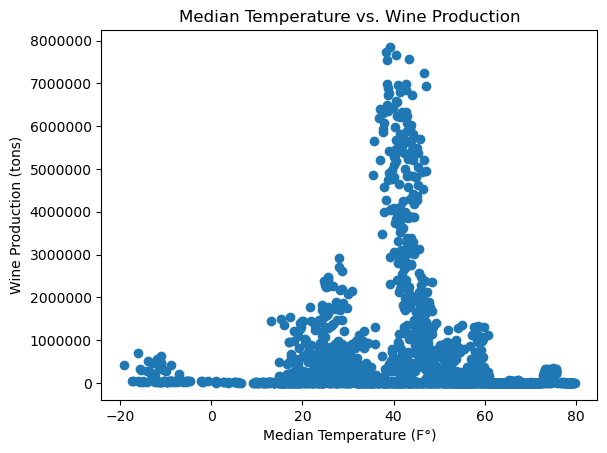

In [15]:
x = country_data_df['Median Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Median Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Median Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

In [57]:
recent_period_end = country_data_df['Year'].max()
recent_period_start = recent_period_end - 33  # Last 10 years as the recent period

# Splitting the country_data_df into two periods
earlier_data = country_data_df[country_data_df['Year'] <= recent_period_start]
recent_data = country_data_df[country_data_df['Year'] > recent_period_start]

# Calculating the average production in earlier and recent periods for each country
earlier_avg_production = earlier_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Earlier Average Production')
recent_avg_production = recent_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Recent Average Production')

# Merging the two datasets
merged_production_periods = pd.merge(earlier_avg_production, recent_avg_production, on='Country')

# Calculating the growth rate
merged_production_periods['Growth Rate %'] = ((merged_production_periods['Recent Average Production'] - merged_production_periods['Earlier Average Production']) / merged_production_periods['Earlier Average Production']) * 100

# Identifying countries with a sharp increase in wine production
sharp_increase_countries = merged_production_periods[merged_production_periods['Growth Rate %'] > 0].sort_values(by='Growth Rate %', ascending=False)
sharp_increase_countries.to_csv("Resources/sharp_increase_countries.csv", index_label="original_index")
sharp_increase_countries.head(10)

,Country,Earlier Average Production,Recent Average Production,Growth Rate %
10,China,3.779936e+04,7.691458e+05,1934.811390
26,New Zealand,1.927110e+04,8.116131e+04,321.155588
20,Lebanon,3.610592e+03,1.350186e+04,273.951536
5,Bolivia,9.521825e+02,3.418131e+03,258.978516
41,Zimbabwe,4.147129e+02,1.336365e+03,222.238733
29,Peru,8.255381e+03,2.565824e+04,210.806182
19,Japan,2.128165e+04,6.571468e+04,208.785663
3,Australia,2.360077e+05,7.118970e+05,201.641359
22,Madagascar,3.053267e+03,6.276894e+03,105.579619
39,United States,1.044319e+06,1.979175e+06,89.518130


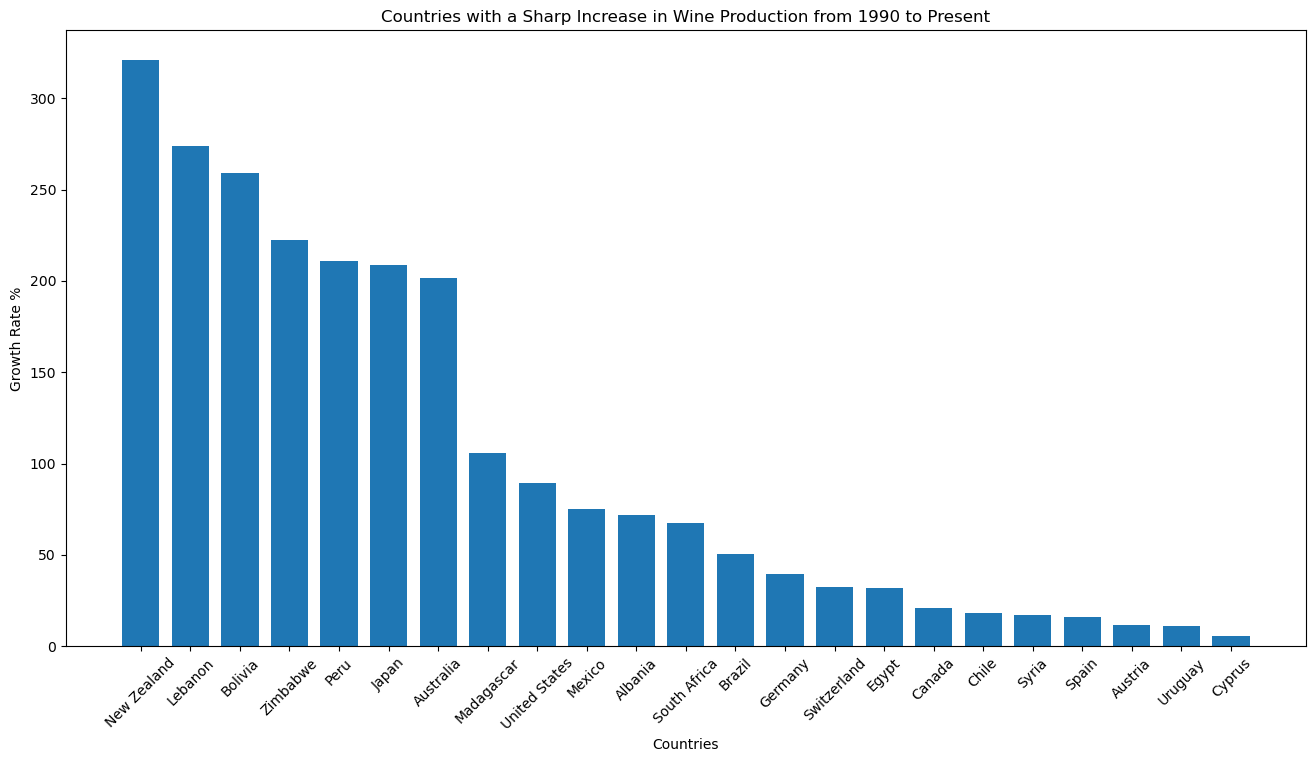

In [60]:
sharp_increase_countries_sliced = sharp_increase_countries[1:]

x = sharp_increase_countries_sliced['Country']
y = sharp_increase_countries_sliced['Growth Rate %']

plt.figure(figsize = (16,8))
plt.bar(x, y, align="center", width = .75)
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Growth Rate %')
plt.title(f'Countries with a Sharp Increase in Wine Production from 1990 to Present without China')

plt.show()